# Problem Statement - Research on car sales ads

You're an analyst at Crankshaft List. Hundreds of free advertisements for vehicles are published on your site every day. You need to study data collected over the last few years and determine which factors influence the price of a vehicle.


In [1]:
import pandas as pd
import matplotlib.pyplot as pl

## Step 1. Open the data file and study the general information

In [2]:
try:
    dataset = pd.read_csv('vehicles_us.csv')
except:
    dataset = pd.read_csv('/datasets/vehicles_us.csv')

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [4]:
dataset.head(10)

price  model_year           model  condition  cylinders fuel  odometer  \
0   9400      2011.0          bmw x5       good        6.0  gas  145000.0   
1  25500         NaN      ford f-150       good        6.0  gas   88705.0   
2   5500      2013.0  hyundai sonata   like new        4.0  gas  110000.0   
3   1500      2003.0      ford f-150       fair        8.0  gas       NaN   
4  14900      2017.0    chrysler 200  excellent        4.0  gas   80903.0   
5  14990      2014.0    chrysler 300  excellent        6.0  gas   57954.0   
6  12990      2015.0    toyota camry  excellent        4.0  gas   79212.0   
7  15990      2013.0     honda pilot  excellent        6.0  gas  109473.0   
8  11500      2012.0     kia sorento  excellent        4.0  gas  104174.0   
9   9200      2008.0     honda pilot  excellent        NaN  gas  147191.0   

  transmission    type paint_color  is_4wd date_posted  days_listed  
0    automatic     SUV         NaN     1.0  2018-06-23           19  
1    automatic  pickup       white     1.0  2018-10-19           50  
2    automatic   sedan         red     NaN  2019-02-07           79  
3    automatic  pickup         NaN     NaN  2019-03-22            9  
4    automatic   sedan       black     NaN  2019-04-02           28  
5    automatic   sedan       black     1.0  2018-06-20           15  
6    automatic   sedan       white     NaN  2018-12-27           73  
7    automatic     SUV       black     1.0  2019-01-07           68  
8    automatic     SUV         NaN     1.0  2018-07-16           19  
9    automatic     SUV        blue     1.0  2019-02-15           17

### Initial Findings:
- There are quite a few NaNs in the dataset (model_year, cylinders, paint_color, is_4wd)
- Model_year can be converted into Integer
- Cylinders can also be converted into Integer


let's further inspect each individual columns for better understanding

In [5]:
dataset.nunique()

price            3443
model_year         68
model             100
condition           6
cylinders           7
fuel                5
odometer        17762
transmission        3
type               13
paint_color        12
is_4wd              1
date_posted       354
days_listed       227
dtype: int64

In [6]:
dataset.isnull().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [7]:
dataset.model_year.value_counts()

2013.0    3549
2012.0    3468
2014.0    3448
2011.0    3375
2015.0    3323
          ... 
1948.0       1
1961.0       1
1936.0       1
1949.0       1
1929.0       1
Name: model_year, Length: 68, dtype: int64

In [8]:
dataset.cylinders.unique()

array([ 6.,  4.,  8., nan,  5., 10.,  3., 12.])

In [9]:
dataset.cylinders.value_counts()

8.0     15844
6.0     15700
4.0     13864
10.0      549
5.0       272
3.0        34
12.0        2
Name: cylinders, dtype: int64

In [10]:
dataset.loc[dataset['cylinders'].isna(),'model'].value_counts()

ford f-150                           316
chevrolet silverado 1500             231
ram 1500                             185
chevrolet silverado                  137
ram 2500                             122
                                    ... 
ford f350 super duty                  20
ford f150 supercrew cab xlt           20
dodge dakota                          18
bmw x5                                16
mercedes-benz benze sprinter 2500      7
Name: model, Length: 100, dtype: int64

In [11]:
dataset.loc[dataset['odometer'].isnull()]

price  model_year                model  condition  cylinders fuel  \
3       1500      2003.0           ford f-150       fair        8.0  gas   
15     17990      2013.0             ram 1500  excellent        8.0  gas   
23      7500      2004.0        jeep wrangler       good        6.0  gas   
24      3950      2009.0         chrysler 200  excellent        4.0  gas   
25     11499      2017.0     chevrolet malibu   like new        4.0  gas   
...      ...         ...                  ...        ...        ...  ...   
51498  15900      2011.0      gmc sierra 1500  excellent        8.0  gas   
51507  29500      2012.0        toyota tundra       good        8.0  gas   
51516   8999      2011.0  jeep grand cherokee       good        6.0  gas   
51519  11750      2015.0         honda accord  excellent        4.0  gas   
51524   6300      2014.0        nissan altima       good        4.0  gas   

       odometer transmission    type paint_color  is_4wd date_posted  \
3           NaN    automatic  pickup         NaN     NaN  2019-03-22   
15          NaN    automatic  pickup         red     1.0  2018-05-15   
23          NaN    automatic     SUV         red     1.0  2018-05-17   
24          NaN    automatic   sedan         red     NaN  2018-06-11   
25          NaN    automatic   sedan         NaN     NaN  2018-07-26   
...         ...          ...     ...         ...     ...         ...   
51498       NaN    automatic   truck         NaN     1.0  2019-01-25   
51507       NaN    automatic  pickup        grey     1.0  2018-05-01   
51516       NaN    automatic     SUV       white     1.0  2018-11-01   
51519       NaN    automatic   coupe         NaN     NaN  2018-11-24   
51524       NaN    automatic   sedan         NaN     NaN  2018-06-05   

       days_listed  
3                9  
15             111  
23              39  
24              40  
25              43  
...            ...  
51498           69  
51507           31  
51516           51  
51519           89  
51524           10  

[7892 rows x 13 columns]

In [12]:
dataset.is_4wd.unique()

array([ 1., nan])

Now this is intersting.  This can also mean the Nan values are actually False or zero... taking 1 as True

In [13]:
dataset.fuel.unique()

array(['gas', 'diesel', 'other', 'hybrid', 'electric'], dtype=object)

In [14]:
dataset.paint_color.unique()

array([nan, 'white', 'red', 'black', 'blue', 'grey', 'silver', 'custom',
       'orange', 'yellow', 'brown', 'green', 'purple'], dtype=object)

In [15]:
dataset.duplicated().value_counts()

False    51525
dtype: int64

### Conclusion

Upon looking a little deeper into the dataset following are my observations for possible anomalies.

- There are 51525 records in the dataset
- Columns (model_year, cylinders, odometer, paint_color, is_4wd) have Nan values.
- Datatype for columns like 'model_year', 'cylinders' can be changed into Integers.
- Column 'is_4wd' can be converted to boolean by filling the NaNs with False

## Step2: Data Preprocessing

### 1. Filling in missing values for is_4wd

As this column is the simplest of them all we will fix it first.

In [16]:
# Filling missing values with 0 in is_4wd column
dataset.is_4wd.fillna(0, inplace=True)

In [17]:
dataset.is_4wd.value_counts()

0.0    25953
1.0    25572
Name: is_4wd, dtype: int64

### 2. Filling in missing values for model_year

From step 1, we came to know that we have almost 3619 entires with model_year missing. So we will try to figure out the distribution of the missing values per model


In [18]:
dataset['model_year'].describe()

count    47906.000000
mean      2009.750470
std          6.282065
min       1908.000000
25%       2006.000000
50%       2011.000000
75%       2014.000000
max       2019.000000
Name: model_year, dtype: float64

In [19]:
dataset.loc[dataset['model_year'].isna(),['model', 'type', 'cylinders']].value_counts()

model                     type    cylinders
chevrolet silverado 1500  truck   8.0          78
ford f-150                truck   8.0          77
ram 1500                  truck   8.0          54
chevrolet silverado       truck   8.0          53
chevrolet silverado 1500  pickup  8.0          48
                                               ..
gmc sierra 1500           truck   6.0           1
                          pickup  6.0           1
                                  4.0           1
ford mustang              other   8.0           1
volkswagen passat         wagon   4.0           1
Length: 337, dtype: int64

In [20]:
dataset.loc[dataset['model_year'].isnull(),['model', 'type', 'cylinders']]

model      type  cylinders
1                      ford f-150    pickup        6.0
20                chevrolet tahoe       SUV        8.0
65                     ford f-150    pickup        6.0
69                     ford f-150     truck        8.0
72                 subaru impreza     sedan        NaN
...                           ...       ...        ...
51464        ford f250 super duty     truck        8.0
51465                   gmc yukon       SUV        8.0
51487                  ford f-150     truck        6.0
51488  chevrolet silverado 3500hd     truck        8.0
51508     chrysler town & country  mini-van        6.0

[3619 rows x 3 columns]

In [21]:
dataset.loc[dataset['model'] == 'ford f-150',['model_year', 'type', 'cylinders']].value_counts()

model_year  type     cylinders
2010.0      truck    8.0          113
2013.0      truck    6.0           82
2014.0      truck    6.0           81
2013.0      truck    8.0           73
2011.0      truck    8.0           73
                                 ... 
2009.0      truck    6.0            1
2010.0      pickup   4.0            1
                     5.0            1
2011.0      offroad  8.0            1
2019.0      truck    10.0           1
Length: 149, dtype: int64

In [22]:
dataset.loc[dataset['model'] == 'ford f-150','model_year'].value_counts()

2013.0    252
2014.0    222
2011.0    222
2010.0    202
2016.0    160
2015.0    150
2012.0    144
2018.0    122
2006.0    122
2005.0    117
2007.0    116
2008.0    107
2004.0     86
2017.0     82
2009.0     73
2003.0     70
2002.0     58
2000.0     44
2001.0     44
1998.0     43
1999.0     36
1997.0     29
1995.0     18
1996.0     14
1994.0     13
1993.0     11
2019.0     10
1989.0      5
1979.0      5
1992.0      5
1987.0      4
1991.0      4
1986.0      4
1988.0      4
1990.0      2
1936.0      1
1977.0      1
1954.0      1
1975.0      1
1929.0      1
Name: model_year, dtype: int64

In [23]:
dataset.loc[dataset['model'] == 'ford f-150']

price  model_year       model  condition  cylinders fuel  odometer  \
1      25500         NaN  ford f-150       good        6.0  gas   88705.0   
3       1500      2003.0  ford f-150       fair        8.0  gas       NaN   
39      8000      2009.0  ford f-150       good        8.0  gas  234000.0   
50      6200      2006.0  ford f-150  excellent        6.0  gas   69698.0   
65     12800         NaN  ford f-150  excellent        6.0  gas  108500.0   
...      ...         ...         ...        ...        ...  ...       ...   
51403  19350      2013.0  ford f-150  excellent        8.0  gas   76474.0   
51419  19900      2013.0  ford f-150       good        6.0  gas   43855.0   
51425   8495      2006.0  ford f-150       good        8.0  gas   96926.0   
51434   3495      2007.0  ford f-150       good        8.0  gas  136782.0   
51487   1495         NaN  ford f-150       fair        6.0  gas   15804.0   

      transmission    type paint_color  is_4wd date_posted  days_listed  
1        automatic  pickup       white     1.0  2018-10-19           50  
3        automatic  pickup         NaN     0.0  2019-03-22            9  
39       automatic   truck       black     1.0  2019-03-31            1  
50       automatic   truck      custom     0.0  2018-05-03           50  
65       automatic  pickup       white     0.0  2018-09-23           15  
...            ...     ...         ...     ...         ...          ...  
51403    automatic   truck       white     1.0  2018-08-23           50  
51419    automatic   truck       black     1.0  2018-06-02           30  
51425    automatic   truck         NaN     1.0  2018-09-23           28  
51434    automatic   truck        blue     0.0  2018-10-22           92  
51487       manual   truck       white     1.0  2018-09-18           56  

[2796 rows x 13 columns]

In [24]:
dataset.model_year.mode()

0    2013.0
Name: model_year, dtype: float64

In [25]:
dataset.loc[dataset['model'] == 'ford f-150','model_year'].mean()

2009.3547024952015

In [26]:
dataset.loc[dataset['model'] == 'ford f-150','model_year'].median()

2011.0

In [27]:
dataset.loc[dataset['model'] == 'ford f-150','model_year'].mode()

0    2013.0
Name: model_year, dtype: float64

In [28]:
dataset.groupby('model').model_year.agg('median')

model
acura tl             2007.0
bmw x5               2010.0
buick enclave        2012.0
cadillac escalade    2009.0
chevrolet camaro     2013.0
                      ...  
toyota sienna        2008.0
toyota tacoma        2010.0
toyota tundra        2009.0
volkswagen jetta     2012.0
volkswagen passat    2013.0
Name: model_year, Length: 100, dtype: float64

In [29]:
mode_values  = dataset.groupby('model').model_year.agg(lambda x:x.value_counts().index[0])

After through analysis, it is feasible to fill the missing values with the highest occuring values for a particular model. Reason behind this decision is because the old models are considered as vintage, hence they have less number of listings as compaired to newer models. Also the newer models usually also have a fewer number of lisitngs because not many people change their cars frequently.

In [30]:
try:
    
    dataset["model_year"] = dataset['model_year'].fillna(dataset.groupby('model')['model_year']
                                                           .transform(lambda x:x.value_counts().index[0]))
except:
    print("Error")


In [31]:
try:
    dataset["model_year"] = dataset["model_year"].astype('int16')
except:
    print('Error in changing data type')

In [32]:
dataset['model_year']

0        2011
1        2013
2        2013
3        2003
4        2017
         ... 
51520    2013
51521    2002
51522    2009
51523    2013
51524    2014
Name: model_year, Length: 51525, dtype: int16

In [33]:
dataset['model_year'].isnull().sum()

0

### Filling Up  Nans in Cylinders column

For this we will use the same approach as above, but for this we will group the data by two columns, 'model' and 'model_year' to find the best values for that particular car. Because usually number of cylinders don't change in same car model. 

In [34]:
dataset.groupby(['model','model_year'])['cylinders'].agg('mean')

model              model_year
acura tl           1999          6.000000
                   2001          6.000000
                   2002          6.000000
                   2003          6.000000
                   2004          5.866667
                                   ...   
volkswagen passat  2014          4.023810
                   2015          4.041667
                   2016          4.222222
                   2017          4.000000
                   2018          4.000000
Name: cylinders, Length: 2226, dtype: float64

In [35]:
dataset.groupby(['model','model_year'])['cylinders'].agg('median')

model              model_year
acura tl           1999          6.0
                   2001          6.0
                   2002          6.0
                   2003          6.0
                   2004          6.0
                                ... 
volkswagen passat  2014          4.0
                   2015          4.0
                   2016          4.0
                   2017          4.0
                   2018          4.0
Name: cylinders, Length: 2226, dtype: float64

In [36]:
dataset.groupby('model')['cylinders'].agg('median')

model
acura tl             6.0
bmw x5               6.0
buick enclave        6.0
cadillac escalade    8.0
chevrolet camaro     6.0
                    ... 
toyota sienna        6.0
toyota tacoma        6.0
toyota tundra        8.0
volkswagen jetta     4.0
volkswagen passat    4.0
Name: cylinders, Length: 100, dtype: float64

In [37]:
dataset.groupby('model')['cylinders'].agg(lambda x:x.value_counts().index[0])

model
acura tl             6.0
bmw x5               6.0
buick enclave        6.0
cadillac escalade    8.0
chevrolet camaro     6.0
                    ... 
toyota sienna        6.0
toyota tacoma        6.0
toyota tundra        8.0
volkswagen jetta     4.0
volkswagen passat    4.0
Name: cylinders, Length: 100, dtype: float64

Since we 'median' and 'mode' have same values, it is safe to assume the most of the cars in a particular model, regardless of their production year have same number of cylinders.  However we can see that that is not 100% true for every case because we can see the 'mean' values are in decimals (near to median and mode values)in some models.

For time being we will fill out the missing values with median number of cylinders for a particular model


In [38]:
try:
    
    dataset["cylinders"] = dataset['cylinders'].fillna(dataset.groupby('model')['cylinders']
                                                           .transform('median'))
except:
    print("Error")

In [39]:
dataset['cylinders'].isnull().sum()

0

Changing the data type from float to 8 bit integer, to make data look clean and lightweight because there is no way to get a fraction of cylinder. Also number of cylinders will never exceed 2 digits ... especially in case of a car. 

In [40]:
try:
    dataset["cylinders"] = dataset["cylinders"].astype('int8')
except:
    print('Error in changing data type')

In [41]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  int16  
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  int8   
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(2), int16(1), int64(2), int8(1), object(7)
memory usage: 4.5+ MB


### Filling missing values for paint_color

As Paint is a categorical data, we will fill in the values by using the same approach of taking mode(most popular) of colors for the cars of a particular model.

In [42]:
dataset.groupby('model')['paint_color'].agg(lambda x:x.value_counts().index[0])

model
acura tl               grey
bmw x5                black
buick enclave         white
cadillac escalade     black
chevrolet camaro        red
                      ...  
toyota sienna        silver
toyota tacoma         white
toyota tundra         white
volkswagen jetta     silver
volkswagen passat     black
Name: paint_color, Length: 100, dtype: object

In [43]:
try:
    
    dataset["paint_color"] = dataset['paint_color'].fillna(dataset.groupby('model')['paint_color']
                                                           .transform(lambda x:x.value_counts().index[0]))
except:
    print("Error")

In [44]:
dataset['paint_color'].isnull().sum()

0

### Filling in Missing values for the odometer

For this we need to find the average milage of a car with respect to it's model and production year

In [45]:
dataset.groupby('model_year')['odometer'].agg('median')

model_year
1908    169328.0
1929         NaN
1936     30000.0
1948      4000.0
1949      1800.0
          ...   
2015     81195.0
2016     55931.5
2017     41426.0
2018     21200.0
2019     14151.5
Name: odometer, Length: 68, dtype: float64

In [46]:
dataset.groupby('model')['odometer'].agg('median')

model
acura tl             141000.0
bmw x5               108500.0
buick enclave        113728.0
cadillac escalade    129176.0
chevrolet camaro      62655.5
                       ...   
toyota sienna        140715.0
toyota tacoma        125000.0
toyota tundra        120500.0
volkswagen jetta     107000.0
volkswagen passat     84905.0
Name: odometer, Length: 100, dtype: float64

In [47]:
dataset.groupby('model_year')['odometer'].agg('mean')

model_year
1908    169328.000000
1929              NaN
1936     30000.000000
1948      4000.000000
1949      1800.000000
            ...      
2015     86134.306725
2016     64147.327341
2017     48669.979275
2018     25923.925459
2019     17076.810976
Name: odometer, Length: 68, dtype: float64

In [48]:
dataset.groupby('model')['odometer'].agg('mean')

model
acura tl             142760.442786
bmw x5               113210.140351
buick enclave        113459.513274
cadillac escalade    123616.592453
chevrolet camaro      71067.983784
                         ...      
toyota sienna        136911.099644
toyota tacoma        126521.257426
toyota tundra        123271.181641
volkswagen jetta     107869.950783
volkswagen passat     90764.366337
Name: odometer, Length: 100, dtype: float64

In [49]:
dataset.groupby(['model','model_year'])['odometer'].agg('median')

model              model_year
acura tl           1999          196000.0
                   2001          177770.0
                   2002          189200.0
                   2003          142500.0
                   2004          183000.0
                                   ...   
volkswagen passat  2014           74931.0
                   2015           69000.0
                   2016           41000.0
                   2017           31755.0
                   2018           32637.0
Name: odometer, Length: 2226, dtype: float64

In [50]:
dataset.groupby(['model','model_year'])['odometer'].agg('mean')

model              model_year
acura tl           1999          196000.000000
                   2001          182408.666667
                   2002          189200.000000
                   2003          140833.400000
                   2004          180106.466667
                                     ...      
volkswagen passat  2014           73726.657143
                   2015           67279.826087
                   2016           54291.000000
                   2017           40741.555556
                   2018           32637.000000
Name: odometer, Length: 2226, dtype: float64

OK, we seem to have a problem here. We are getting Nans in Median and means ... let see where they are.

Apart from that we can see there isn't much difference between mean and median values.

In [51]:
dataset.groupby('model')['odometer'].agg('mean').isnull().sum()

1

In [52]:
dataset.groupby('model_year')['odometer'].agg('mean').isnull().sum()

1

In [53]:
dataset.groupby(['model_year','model'])['odometer'].agg('median').isnull().sum()

38

In [54]:
(dataset.groupby(['model', 'model_year']).agg('count').query('odometer == 0'))

price  condition  cylinders  \
model                             model_year                                
cadillac escalade                 1908            1          1          1   
chevrolet corvette                1960            1          1          1   
                                  1976            1          1          1   
chevrolet impala                  1994            1          1          1   
chevrolet malibu                  1970            2          2          2   
                                  1980            1          1          1   
chevrolet silverado               1978            1          1          1   
chevrolet suburban                1977            1          1          1   
                                  1985            1          1          1   
chrysler 200                      2009            1          1          1   
ford econoline                    2000            1          1          1   
ford edge                         2019            1          1          1   
ford f-150                        1929            1          1          1   
                                  1975            1          1          1   
                                  1977            1          1          1   
ford f-250                        1983            1          1          1   
ford f-250 sd                     2019            1          1          1   
ford f-350 sd                     2003            1          1          1   
ford f150                         1993            1          1          1   
                                  1994            1          1          1   
ford f350 super duty              1997            1          1          1   
ford mustang gt coupe 2d          1996            1          1          1   
ford ranger                       2019            2          2          2   
ford taurus                       1986            1          1          1   
                                  1996            2          2          2   
gmc sierra                        1979            1          1          1   
                                  1989            1          1          1   
gmc sierra 2500hd                 1995            1          1          1   
honda civic                       1991            1          1          1   
                                  1993            2          2          2   
honda odyssey                     1999            1          1          1   
hyundai sonata                    2001            1          1          1   
jeep cherokee                     1991            1          1          1   
                                  2006            1          1          1   
kia sorento                       2007            2          2          2   
mercedes-benz benze sprinter 2500 2013           41         41         41   
toyota tacoma                     1989            1          1          1   
volkswagen passat                 1995            1          1          1   

                                              fuel  odometer  transmission  \
model                             model_year                                 
cadillac escalade                 1908           1         0             1   
chevrolet corvette                1960           1         0             1   
                                  1976           1         0             1   
chevrolet impala                  1994           1         0             1   
chevrolet malibu                  1970           2         0             2   
                                  1980           1         0             1   
chevrolet silverado               1978           1         0             1   
chevrolet suburban                1977           1         0             1   
                                  1985           1         0             1   
chrysler 200                      2009           1         0             1   
ford econoline               

It seem like we have 38 entries that is causing trouble, most of them only have one or two listings except for "2013- mercedes-benz benze sprinter 2500" which has 41 listings and for all of them odometer reading is missing. 

So we will do this in two steps to avoid data corruption ... 

- Step 1: we will update teh missing values with median values of odometer grouped by model and model year.
- Step 2: For rest of 38 values we will fill the median values of odometer grouped by only model_year, to get atleast the colosest values per year. 

In [55]:

dataset["odometer"] = dataset.groupby(['model','model_year'])['odometer'].apply(lambda x: x.fillna(x.median()))


In [56]:
dataset["odometer"].isnull().sum()

83

In [57]:
dataset["odometer"] = dataset.groupby('model_year')['odometer'].apply(lambda x: x.fillna(x.median()))

In [58]:
dataset["odometer"].isnull().sum()

1

In [59]:
 dataset[dataset["odometer"].isnull()]

price  model_year       model condition  cylinders fuel  odometer  \
45694  18000        1929  ford f-150      good          8  gas       NaN   

      transmission   type paint_color  is_4wd date_posted  days_listed  
45694       manual  other      silver     0.0  2018-11-18           59

This leaves us with only one entry and as we will see below this is only one entry for this particular year, so we can drop it.

In [60]:
dataset.query('model_year == 1929')

price  model_year       model condition  cylinders fuel  odometer  \
45694  18000        1929  ford f-150      good          8  gas       NaN   

      transmission   type paint_color  is_4wd date_posted  days_listed  
45694       manual  other      silver     0.0  2018-11-18           59

In [61]:
dataset = dataset[dataset['model_year'] != 1929]

In [62]:
dataset["odometer"].isnull().sum()

0

### Changing datatype of data posted  column to datetime

In [63]:
try: 
    dataset['date_posted'] = pd.to_datetime(dataset['date_posted'], format='%Y-%m-%d')
except:
    print(error)

In [64]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51524 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51524 non-null  int64         
 1   model_year    51524 non-null  int16         
 2   model         51524 non-null  object        
 3   condition     51524 non-null  object        
 4   cylinders     51524 non-null  int8          
 5   fuel          51524 non-null  object        
 6   odometer      51524 non-null  float64       
 7   transmission  51524 non-null  object        
 8   type          51524 non-null  object        
 9   paint_color   51524 non-null  object        
 10  is_4wd        51524 non-null  float64       
 11  date_posted   51524 non-null  datetime64[ns]
 12  days_listed   51524 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int16(1), int64(2), int8(1), object(6)
memory usage: 4.9+ MB


Now our data is cleaned, all the missing values are filled and all columns have updated datatypes

## Step3: Calculating and adding extra columns

### 1. Adding weekday , month and year information to dataset

In [65]:
dataset['day_posted'] = dataset['date_posted'].dt.dayofweek
dataset['month_posted'] = dataset['date_posted'].dt.month
dataset['year_posted'] = dataset['date_posted'].dt.year
dataset.head()

price  model_year           model  condition  cylinders fuel  odometer  \
0   9400        2011          bmw x5       good          6  gas  145000.0   
1  25500        2013      ford f-150       good          6  gas   88705.0   
2   5500        2013  hyundai sonata   like new          4  gas  110000.0   
3   1500        2003      ford f-150       fair          8  gas  177500.0   
4  14900        2017    chrysler 200  excellent          4  gas   80903.0   

  transmission    type paint_color  is_4wd date_posted  days_listed  \
0    automatic     SUV       black     1.0  2018-06-23           19   
1    automatic  pickup       white     1.0  2018-10-19           50   
2    automatic   sedan         red     0.0  2019-02-07           79   
3    automatic  pickup       white     0.0  2019-03-22            9   
4    automatic   sedan       black     0.0  2019-04-02           28   

   day_posted  month_posted  year_posted  
0           5             6         2018  
1           4            10         2018  
2           3             2         2019  
3           4             3         2019  
4           1             4         2019

### 2. Adding vehicle's Age information to dataset

In [66]:
dataset['vehicle_age'] = dataset['year_posted'] - dataset['model_year']

In [67]:
dataset.head()

price  model_year           model  condition  cylinders fuel  odometer  \
0   9400        2011          bmw x5       good          6  gas  145000.0   
1  25500        2013      ford f-150       good          6  gas   88705.0   
2   5500        2013  hyundai sonata   like new          4  gas  110000.0   
3   1500        2003      ford f-150       fair          8  gas  177500.0   
4  14900        2017    chrysler 200  excellent          4  gas   80903.0   

  transmission    type paint_color  is_4wd date_posted  days_listed  \
0    automatic     SUV       black     1.0  2018-06-23           19   
1    automatic  pickup       white     1.0  2018-10-19           50   
2    automatic   sedan         red     0.0  2019-02-07           79   
3    automatic  pickup       white     0.0  2019-03-22            9   
4    automatic   sedan       black     0.0  2019-04-02           28   

   day_posted  month_posted  year_posted  vehicle_age  
0           5             6         2018            7  
1           4            10         2018            5  
2           3             2         2019            6  
3           4             3         2019           16  
4           1             4         2019            2

In [68]:
dataset['vehicle_age'].unique()

array([  7,   5,   6,  16,   2,   4,   3,  11,   1,  10,   8,   0,  15,
        14,   9,  13,  17,  12,  53,  24,  18,  19,  26,  22,  38,  20,
        23,  44,  21,  25,  33,  42,  31,  43,  29,  28,  46,  52,  49,
        30,  40,  54,  39,  50,  27,  32,  55,  37,  56,  34,  45,  41,
        51,  63,  47,  48,  36,  35,  65,  57,  71,  58,  59, 110,  82,
        69,  60], dtype=int64)

### 3. Adding vehicle's Average Mileage information to dataset

For getting average mileage of the given car we will divide the odometer reading with the car's age. But we have certain cars with age = 0, or they are listed in the same year they were manufactured. For them we will keep the same reading of odometer.

In [69]:
dataset.loc[dataset['vehicle_age'] != 0 , 'avg_mileage'] = dataset.loc[dataset['vehicle_age'] != 0, 'odometer' ] / dataset.loc[dataset['vehicle_age'] != 0, 'vehicle_age' ]
dataset.loc[dataset['vehicle_age'] == 0 , 'avg_mileage'] = dataset.loc[dataset['vehicle_age'] == 0, 'odometer' ]

In [70]:
dataset['avg_mileage'].head()

0    20714.285714
1    17741.000000
2    18333.333333
3    11093.750000
4    40451.500000
Name: avg_mileage, dtype: float64

In [71]:
# Rounding off the values to have a cleaner look

dataset['avg_mileage'] = dataset['avg_mileage'].round().astype('int32')

In [72]:
dataset['avg_mileage'].head()

0    20714
1    17741
2    18333
3    11094
4    40452
Name: avg_mileage, dtype: int32

### 4. Adding vehicle's condition information to dataset

In [73]:
dataset['condition'].unique()

array(['good', 'like new', 'fair', 'excellent', 'salvage', 'new'],
      dtype=object)

In [74]:
scale_dict = {'new': 5,
              'like new': 4,
              'excellent':3,
              'good':2,
              'fair':1,
              'salvage':0
                }
dataset['condition'] = dataset['condition'].replace(scale_dict).astype(int)
dataset.head()

price  model_year           model  condition  cylinders fuel  odometer  \
0   9400        2011          bmw x5          2          6  gas  145000.0   
1  25500        2013      ford f-150          2          6  gas   88705.0   
2   5500        2013  hyundai sonata          4          4  gas  110000.0   
3   1500        2003      ford f-150          1          8  gas  177500.0   
4  14900        2017    chrysler 200          3          4  gas   80903.0   

  transmission    type paint_color  is_4wd date_posted  days_listed  \
0    automatic     SUV       black     1.0  2018-06-23           19   
1    automatic  pickup       white     1.0  2018-10-19           50   
2    automatic   sedan         red     0.0  2019-02-07           79   
3    automatic  pickup       white     0.0  2019-03-22            9   
4    automatic   sedan       black     0.0  2019-04-02           28   

   day_posted  month_posted  year_posted  vehicle_age  avg_mileage  
0           5             6         2018            7        20714  
1           4            10         2018            5        17741  
2           3             2         2019            6        18333  
3           4             3         2019           16        11094  
4           1             4         2019            2        40452

Once we have all the necessary information setup for our EDA, let's dive into our analysis

## Step 4: Carrying out exploratory data analysis

### Ploting histograms

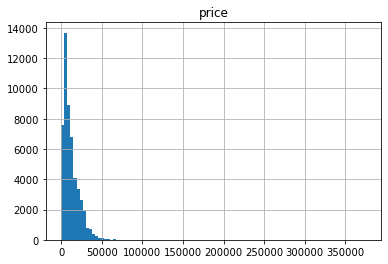

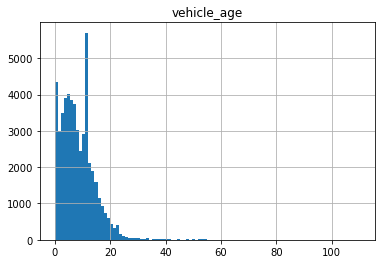

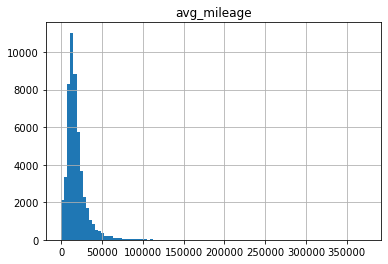

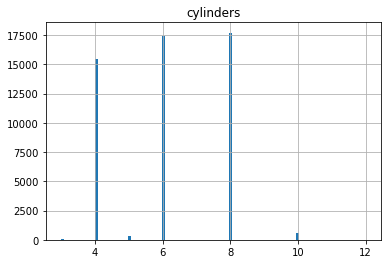

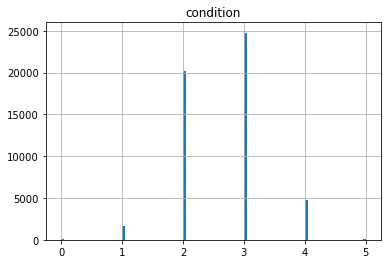

In [75]:
columns = ['price', 'vehicle_age' , 'avg_mileage', 'cylinders', 'condition' ]

for column in columns:
    dataset.hist(column, bins=100)

In [76]:
dataset.loc[dataset.price < 200, 'price']

405        1
844      111
1572     155
1573     176
2143     196
        ... 
50245      1
50393      1
50430      5
50971     10
51256      1
Name: price, Length: 911, dtype: int64

From the histograms we can see that.
- PRICE: 
       - around 7000 entries are near zero... that might be an indication of a possible outlier.
       - majority of cars in the dataset are below 25000 price range.
- AGE: 
       - most of the cars in the listings are less than 10 years old.
       - There are a very few aged more than 20 years.
- Average-Mileage:
       - Around 2000 entiries have an average mileage near 0.
- Cylinders:
       - Most of the cars listed have 4,6 or 8 cylinders.
- Condition:
       - most of the are either in excellent or good condition. A very few of them are new or in salvage condition.

### Identifying Upper Limits to the Outliers

To identify the upper limits we first need to see the quartiles, one way we learned that was the describe method and the other way was to plot a boxplot. Let'stry both of them and see how things work out.

In [77]:
for column in columns:
    print(dataset[column].describe(), '\n\n')

count     51524.00000
mean      12132.35104
std       10040.86718
min           1.00000
25%        5000.00000
50%        9000.00000
75%       16836.00000
max      375000.00000
Name: price, dtype: float64 


count    51524.000000
mean         8.432672
std          6.148167
min          0.000000
25%          4.000000
50%          7.000000
75%         12.000000
max        110.000000
Name: vehicle_age, dtype: float64 


count     51524.000000
mean      18273.562068
std       13485.412039
min           0.000000
25%       10909.000000
50%       15250.000000
75%       21874.000000
max      373200.000000
Name: avg_mileage, dtype: float64 


count    51524.000000
mean         6.121031
std          1.657452
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64 


count    51524.000000
mean         2.637548
std          0.712449
min          0.000000
25%          2.000000
50%          3.000000
75%          3.0

<AxesSubplot:>

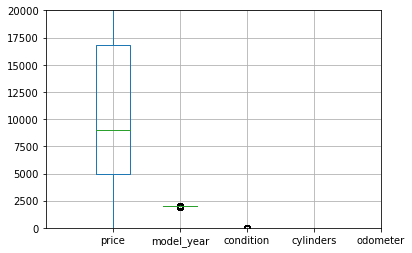

In [78]:
import matplotlib.pyplot as plt 

plt.ylim(-1, 20000)
plt.xlim(0, 5)
dataset.boxplot()

The infomrmation in this box plot is unreadable for all the columns except 'Price'.  Let's try to plot box plot of each column sepeartly

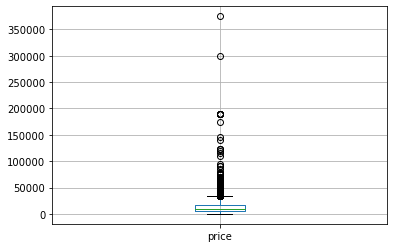

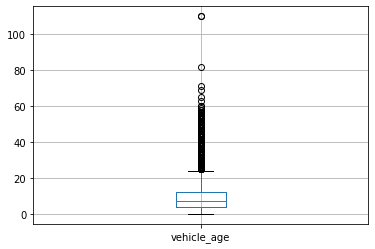

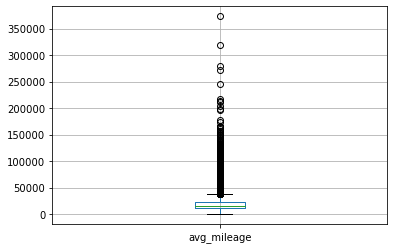

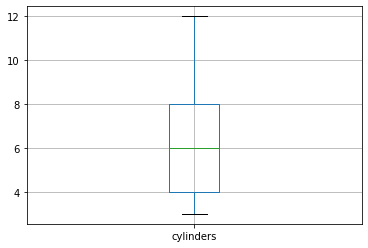

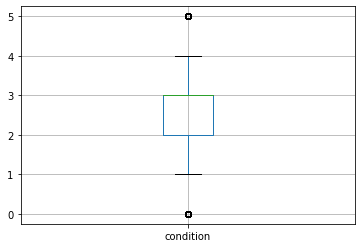

In [79]:
for column in columns:
    dataset.boxplot(column)
    plt.show()

This gives us a readable boxplots. Now once we have 5 point summary of all the columns of interest it is time to calculate the IQR values for them. We will be using these IQR values to define the upper limits of the outliers.

In [80]:
IQR_dict = dict()

for column in columns:
    IQR_dict[column] =  dataset[column].describe()['75%'] -  dataset[column].describe()['25%']
    

IQR_dict

{'price': 11836.0,
 'vehicle_age': 8.0,
 'avg_mileage': 10965.0,
 'cylinders': 4.0,
 'condition': 1.0}

For finding the limits of the outliers we will simply use the formulas below  

Upper Limit = Q3 + 1.5 x IQR

Lower Limit = Q1 - 1.5 x IQR

In [81]:
import collections 

limits_dict = collections.defaultdict(dict)

for column in columns:
    limits_dict[column]['upper'] =  dataset[column].describe()['75%'] + (1.5 * IQR_dict[column] )
    limits_dict[column]['lower'] =  dataset[column].describe()['25%'] - (1.5 * IQR_dict[column] )

limits_dict

defaultdict(dict,
            {'price': {'upper': 34590.0, 'lower': -12754.0},
             'vehicle_age': {'upper': 24.0, 'lower': -8.0},
             'avg_mileage': {'upper': 38321.5, 'lower': -5538.5},
             'cylinders': {'upper': 14.0, 'lower': -2.0},
             'condition': {'upper': 4.5, 'lower': 0.5}})

Till this point we successfully defined the upper and lower limits of the data set outliers... no let's find exactly how many values resides outside these limits. 

First we will try to figure out graphically

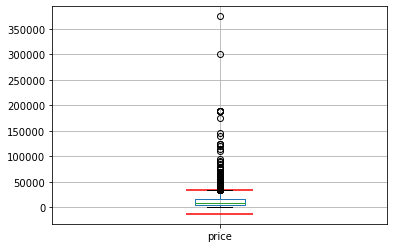

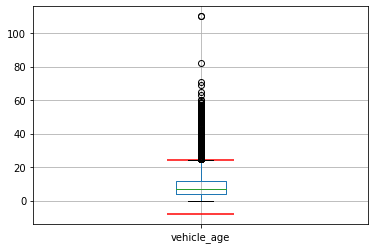

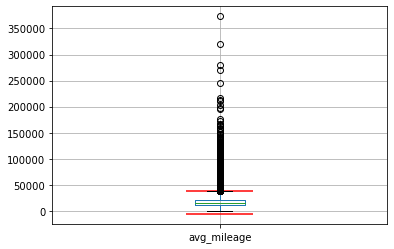

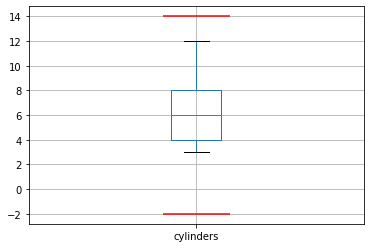

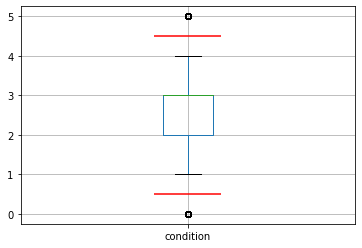

In [82]:
for column in columns:
    dataset.boxplot(column)
    plt.hlines(y=[limits_dict[column]['upper'], limits_dict[column]['lower']], xmin=0.9, xmax=1.1, color='red') 
    plt.show()


This gives us a visual representation of where exaclty the limits lay in our data. Lets now try to get exact amount of outliers for every column

In [83]:
for column in columns:
    up_count = len(dataset.loc[dataset[column]>limits_dict[column]['upper']])
    low_count = len(dataset.loc[dataset[column]<limits_dict[column]['lower']])
    print("For column '{0}' the number of records above the upper limit are {1} and below lower limit are {2}". format(column, up_count, low_count))

For column 'price' the number of records above the upper limit are 1650 and below lower limit are 0
For column 'vehicle_age' the number of records above the upper limit are 736 and below lower limit are 0
For column 'avg_mileage' the number of records above the upper limit are 3195 and below lower limit are 0
For column 'cylinders' the number of records above the upper limit are 0 and below lower limit are 0
For column 'condition' the number of records above the upper limit are 143 and below lower limit are 115


From the above the analysis we can see there are a very outliers in the lower limits except for the condition column which means only 115 cars listed which were in 'salvage' condition.

But for upper limit outliers we have quite a quite a few entries.


### Slicing the Upper limit outliers from the dataset



In [84]:
filtered_dataset = dataset

for column in columns:
    filtered_dataset = filtered_dataset[filtered_dataset[column] < limits_dict[column]['upper']]

In [85]:
len(filtered_dataset)

46022

In [86]:
len(dataset)

51524

### Ploting histograms for filtered dataset and compair the changes

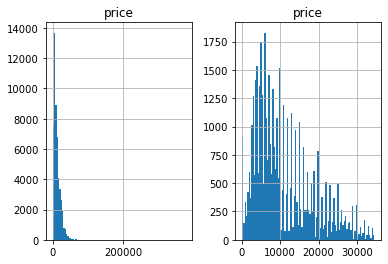

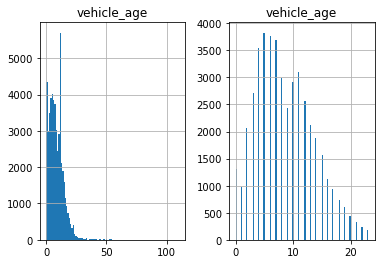

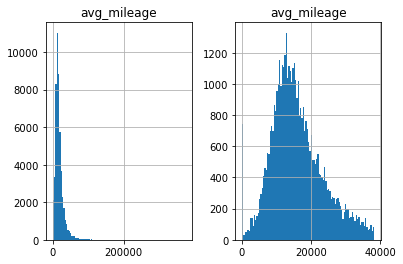

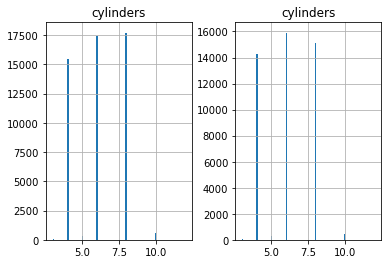

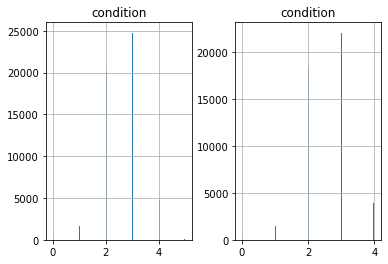

In [87]:
for column in columns:
    fig, axes = plt.subplots(1, 2)
    dataset.hist(column, bins=100,  ax=axes[0])
    filtered_dataset.hist(column, bins=100,  ax=axes[1])

In [88]:
for column in columns:
    print(filtered_dataset[column].describe(), '\n\n')

count    46022.000000
mean     10883.390726
std       7689.977494
min          1.000000
25%       4995.000000
50%       8750.000000
75%      15000.000000
max      34555.000000
Name: price, dtype: float64 


count    46022.000000
mean         8.595780
std          4.989695
min          0.000000
25%          5.000000
50%          8.000000
75%         12.000000
max         23.000000
Name: vehicle_age, dtype: float64 


count    46022.000000
mean     15971.117161
std       7514.526150
min          0.000000
25%      10875.000000
50%      14826.000000
75%      20195.000000
max      38321.000000
Name: avg_mileage, dtype: float64 


count    46022.000000
mean         6.067207
std          1.647872
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64 


count    46022.000000
mean         2.615445
std          0.695326
min          0.000000
25%          2.000000
50%          3.000000
75%          3.000000
ma

After filtering we lost 5502 rows, but we can see that

- price is now capped at 34555 instead of ridiculously high 375000.
- Similarly the case for average mileage is capped at 38321 from 373200 miles per year which means around 1022 miles per day (This is only possible if the car was always on road 24/7 .. maybe these were Taxis)
- Vehicle age is also capped around 23 instead of 110 years.
- For Cylinders there is no change as nothing was outside of either limits
- As for the 'Condtion' we no longer have entries for new cars.

However the dataset looks more promising now

### Judging the behaviour of ads according to the "days_listed " column 

array([[<AxesSubplot:title={'center':'days_listed'}>]], dtype=object)

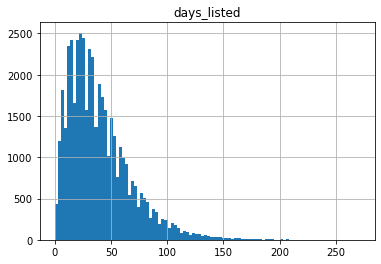

In [89]:
filtered_dataset.hist('days_listed', bins=100)

In [90]:
frequency = filtered_dataset.days_listed.value_counts()
frequency

18     863
20     852
24     851
22     839
13     829
      ... 
240      1
209      1
188      1
192      1
186      1
Name: days_listed, Length: 225, dtype: int64

In [91]:
filtered_dataset.sort_values(by='days_listed').days_listed.value_counts()

18     863
20     852
24     851
22     839
13     829
      ... 
200      1
201      1
203      1
204      1
271      1
Name: days_listed, Length: 225, dtype: int64

In [92]:
print(filtered_dataset.days_listed.min(), filtered_dataset.days_listed.max())

0 271


<AxesSubplot:>

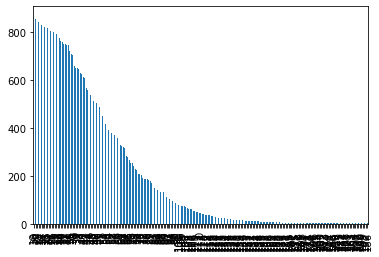

In [93]:
filtered_dataset.days_listed.value_counts().plot(kind='bar')

In [94]:
len(dataset.query('days_listed > 280'))

0

In [95]:
filtered_dataset.days_listed.describe()

count    46022.000000
mean        39.534201
std         28.214908
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

In [96]:
filtered_dataset.days_listed.mean()

39.534201034287946

In [97]:
filtered_dataset.days_listed.median()

33.0

Above analysis shows that although there are ads which were removed within a day and there are also ads which had a life span of over 9 months.

From plotting histogram we see that most ads had a life span below 53 days, making an average life span of 39.5 days. 


Now we will try to figure out how much data is outside the limits.

<AxesSubplot:>

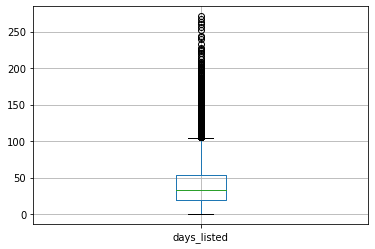

In [98]:
filtered_dataset.boxplot('days_listed')


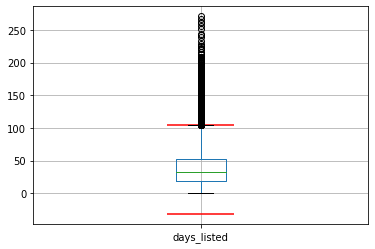

In [99]:
iqr = filtered_dataset['days_listed'].quantile(0.75) - filtered_dataset['days_listed'].quantile(0.25)
low_limit = filtered_dataset['days_listed'].quantile(0.25) - (1.5*iqr)
upper_limit = filtered_dataset['days_listed'].quantile(0.75) + (1.5*iqr)
filtered_dataset.boxplot('days_listed')
plt.hlines(y=[upper_limit, low_limit], xmin=0.9, xmax=1.1, color='red') 

We can say that ads having life span more than 104 days are possible outliers. Now we will try to figure out which attribute has an affect on the life span of ad.


For this purpose we will find correlation among the 5 columns with numeric values and life span of ad.

<ipython-input-100-9a40711ea5b5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_dataset['days_listed'] = filtered_dataset['days_listed']


array([[<AxesSubplot:xlabel='price', ylabel='price'>,
        <AxesSubplot:xlabel='vehicle_age', ylabel='price'>,
        <AxesSubplot:xlabel='avg_mileage', ylabel='price'>,
        <AxesSubplot:xlabel='cylinders', ylabel='price'>,
        <AxesSubplot:xlabel='condition', ylabel='price'>,
        <AxesSubplot:xlabel='days_listed', ylabel='price'>],
       [<AxesSubplot:xlabel='price', ylabel='vehicle_age'>,
        <AxesSubplot:xlabel='vehicle_age', ylabel='vehicle_age'>,
        <AxesSubplot:xlabel='avg_mileage', ylabel='vehicle_age'>,
        <AxesSubplot:xlabel='cylinders', ylabel='vehicle_age'>,
        <AxesSubplot:xlabel='condition', ylabel='vehicle_age'>,
        <AxesSubplot:xlabel='days_listed', ylabel='vehicle_age'>],
       [<AxesSubplot:xlabel='price', ylabel='avg_mileage'>,
        <AxesSubplot:xlabel='vehicle_age', ylabel='avg_mileage'>,
        <AxesSubplot:xlabel='avg_mileage', ylabel='avg_mileage'>,
        <AxesSubplot:xlabel='cylinders', ylabel='avg_mileage'>,
      

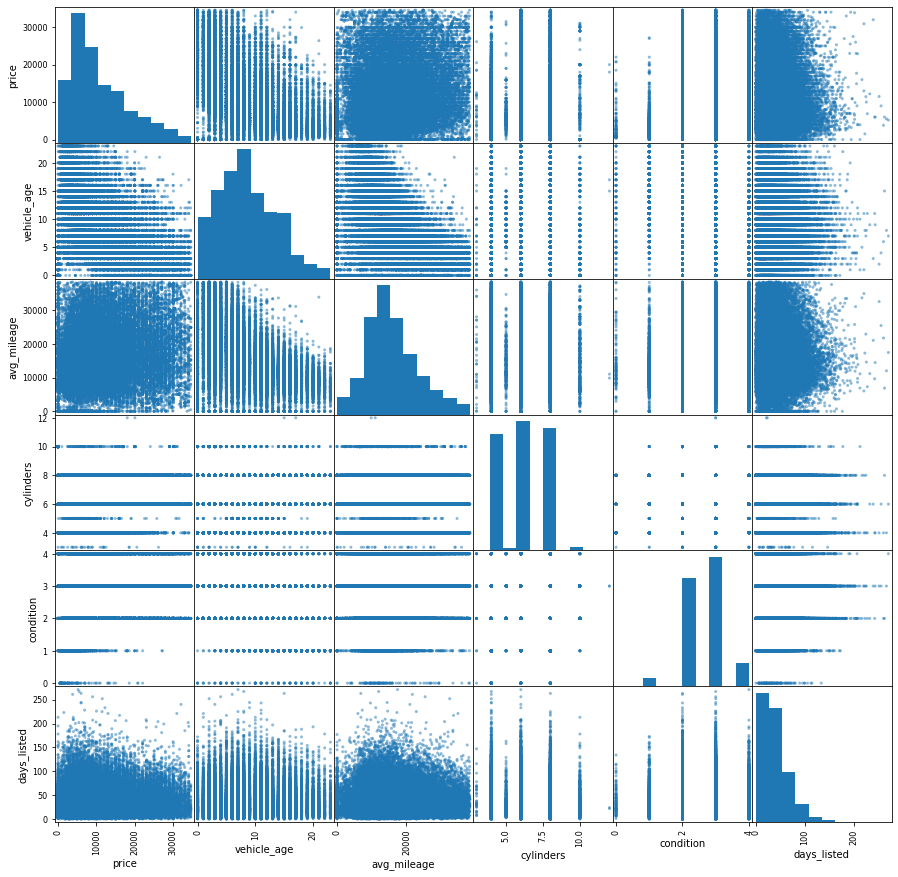

In [100]:
temp_dataset = filtered_dataset[columns]
temp_dataset['days_listed'] = filtered_dataset['days_listed']
pd.plotting.scatter_matrix(temp_dataset, figsize=(15, 15)) 

In [101]:
filtered_dataset.corr()

price  model_year  condition  cylinders  odometer    is_4wd  \
price         1.000000    0.511469   0.194664   0.306061 -0.441304  0.327415   
model_year    0.511469    1.000000   0.277472  -0.158929 -0.618994 -0.019529   
condition     0.194664    0.277472   1.000000  -0.076872 -0.280172  0.001532   
cylinders     0.306061   -0.158929  -0.076872   1.000000  0.132628  0.411291   
odometer     -0.441304   -0.618994  -0.280172   0.132628  1.000000  0.060906   
is_4wd        0.327415   -0.019529   0.001532   0.411291  0.060906  1.000000   
days_listed  -0.002696   -0.002432   0.000832   0.001775  0.004834  0.003454   
day_posted    0.000224    0.001377   0.003732  -0.004534  0.000180  0.003523   
month_posted -0.023213   -0.042697  -0.007944   0.003254  0.019876  0.001966   
year_posted   0.021996    0.044840   0.009224  -0.002884 -0.015901  0.000312   
vehicle_age  -0.509334   -0.995655  -0.276567   0.158634  0.617410  0.019555   
avg_mileage   0.199299    0.526638   0.055208  -0.044465  0.167131  0.048095   

              days_listed  day_posted  month_posted  year_posted  vehicle_age  \
price           -0.002696    0.000224     -0.023213     0.021996    -0.509334   
model_year      -0.002432    0.001377     -0.042697     0.044840    -0.995655   
condition        0.000832    0.003732     -0.007944     0.009224    -0.276567   
cylinders        0.001775   -0.004534      0.003254    -0.002884     0.158634   
odometer         0.004834    0.000180      0.019876    -0.015901     0.617410   
is_4wd           0.003454    0.003523      0.001966     0.000312     0.019555   
days_listed      1.000000    0.002680     -0.011049     0.012428     0.003590   
day_posted       0.002680    1.000000      0.005807    -0.006040    -0.001939   
month_posted    -0.011049    0.005807      1.000000    -0.821268    -0.033861   
year_posted      0.012428   -0.006040     -0.821268     1.000000     0.048377   
vehicle_age      0.003590   -0.001939     -0.033861     0.048377     1.000000   
avg_mileage     -0.001865   -0.000719      0.087398    -0.105259    -0.536362   

              avg_mileage  
price            0.199299  
model_year       0.526638  
condition        0.055208  
cylinders       -0.044465  
odometer         0.167131  
is_4wd           0.048095  
days_listed     -0.001865  
day_posted      -0.000719  
month_posted     0.087398  
year_posted     -0.105259  
vehicle_age     -0.536362  
avg_mileage      1.000000

So basically we didn't get any actionable information form plotting correlation on whloe dataset, seems like days_listed is not correlated to anyother column in the dataset

Let's try to change our approach, divide and conqure :P
For that we will slice the dataset to get two separate datasets:
1. One with all the entries above upper limit
2. One with all the entries below the Q1

Once we get these two we will againg try to find the correlation

In [102]:
long_ads_ds = filtered_dataset.query('days_listed >= @upper_limit' )
long_ads_ds.corr()['days_listed']

price          -0.020856
model_year      0.020530
condition      -0.021204
cylinders      -0.016098
odometer       -0.008805
is_4wd         -0.010901
days_listed     1.000000
day_posted     -0.036707
month_posted   -0.017425
year_posted     0.021713
vehicle_age    -0.018481
avg_mileage    -0.006154
Name: days_listed, dtype: float64

In [103]:
len(long_ads_ds)

1526

<AxesSubplot:>

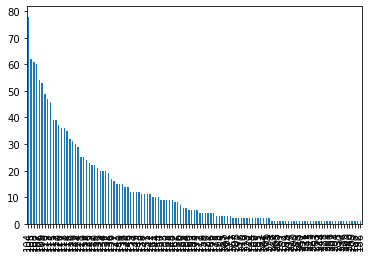

In [104]:
long_ads_ds.days_listed.value_counts().plot(kind='bar')

In [105]:
short_ads_ds = filtered_dataset.query('days_listed <= @filtered_dataset.days_listed.quantile(0.25)' )
short_ads_ds.corr()['days_listed']

price          -0.009322
model_year     -0.010169
condition      -0.000848
cylinders      -0.000977
odometer        0.002577
is_4wd         -0.002554
days_listed     1.000000
day_posted      0.003328
month_posted    0.009899
year_posted    -0.003752
vehicle_age     0.009812
avg_mileage    -0.008785
Name: days_listed, dtype: float64

In [106]:
len(short_ads_ds)

12058

<AxesSubplot:>

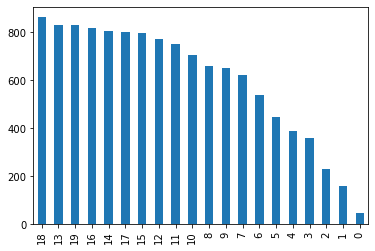

In [107]:
short_ads_ds.days_listed.value_counts().plot(kind='bar')

There seems no correlation, let's try to look from another angle.

In [108]:
ld_pivot = long_ads_ds.pivot_table(index='days_listed', values=['vehicle_age','price', 'condition'], aggfunc='mean')
ld_pivot

condition         price  vehicle_age
days_listed                                      
104           2.692308   9735.435897     9.756410
105           2.822581  11381.612903     8.919355
106           2.611111  12032.018519     8.407407
107           2.650000  11405.183333     7.983333
108           2.491803  10731.786885     8.016393
...                ...           ...          ...
256           3.000000   8980.000000     4.000000
261           2.000000   3800.000000     6.000000
263           2.000000   5995.000000    15.000000
267           3.000000   5500.000000     8.000000
271           4.000000   5200.000000     7.000000

[121 rows x 3 columns]

array([[<AxesSubplot:title={'center':'condition'}>,
        <AxesSubplot:title={'center':'price'}>],
       [<AxesSubplot:title={'center':'vehicle_age'}>, <AxesSubplot:>]],
      dtype=object)

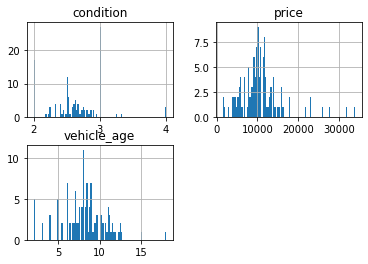

In [109]:
ld_pivot.hist(bins=100)

That satisfied our hypothesis.

lets do the same for the ads with shorter life span

In [110]:
sh_pivot = short_ads_ds.pivot_table(index='days_listed', values=['vehicle_age','price', 'condition'], aggfunc='mean')
sh_pivot

condition         price  vehicle_age
days_listed                                      
0             2.586957  10719.086957     9.673913
1             2.649682  11948.923567     7.910828
2             2.655022  11892.847162     8.004367
3             2.652661  11039.703081     8.565826
4             2.626289  10792.654639     9.079897
5             2.589286  10922.698661     8.071429
6             2.629423  10734.407821     8.856611
7             2.634029  10668.313002     8.626003
8             2.604262  11057.248097     8.493151
9             2.584615  10611.658462     8.520000
10            2.619858  10710.268085     8.709220
11            2.599466  10892.898531     8.415220
12            2.564036  10841.921087     8.661061
13            2.653800  10784.767189     8.448733
14            2.629032  10753.389578     8.457816
15            2.578616  11188.567296     8.738365
16            2.644689  11274.306471     8.385836
17            2.580726  10887.327910     8.862328
18            2.660487  10749.659328     8.521437
19            2.618357  10479.194444     8.830918

In [111]:
filtered_dataset.sort_values(by='days_listed').tail(30)

price  model_year                        model  condition  cylinders  \
18890   6490        2014                ford focus se          3          4   
37002  33858        2015                     ram 1500          3          8   
17301   9885        2011                  toyota rav4          3          4   
14591  25988        2016          chevrolet silverado          3          8   
26096  23000        2015              gmc sierra 1500          2          8   
10650  17700        2015  nissan frontier crew cab sv          2          6   
16515  14900        2014           chevrolet traverse          2          6   
9630    8995        2008            toyota highlander          4          6   
20753  22905        2012                jeep wrangler          2          6   
49870   3995        2006            chevrolet equinox          2          6   
21426   3950        2007               subaru outback          3          4   
48969      1        2018             chevrolet camaro          3         10   
39444   3950        2009               subaru impreza          2          4   
30457  16000        2013                toyota tundra          2          8   
16207  30898        2007                toyota tundra          3          8   
50681  12985        2017               toyota corolla          3          4   
34302   1500        2010               hyundai sonata          2          4   
24507  11444        2011                   ford f-150          3          8   
16828   9995        2011               subaru outback          3          4   
3243    6900        2007                 honda accord          2          4   
14977  12200        2009      jeep wrangler unlimited          2          6   
19763  31995        2015      jeep wrangler unlimited          3          6   
24527   5995        2007                  toyota rav4          2          4   
3202    5995        2009                 toyota prius          3          4   
46583  11500        2017                  ford fusion          3          4   
7875    8980        2015                nissan altima          3          6   
51      3800        2012                   ford focus          2          4   
2224    5995        2004                   ford f-250          2          8   
28756   5500        2011                 nissan versa          3          4   
4360    5200        2011             chevrolet impala          4          6   

      fuel  odometer transmission       type paint_color  is_4wd date_posted  \
18890  gas   82258.0    automatic      sedan      silver     0.0  2018-05-26   
37002  gas   86000.0    automatic      truck       black     1.0  2019-03-29   
17301  gas   95000.0    automatic        SUV       green     1.0  2019-03-29   
14591  gas   62000.0    automatic     pickup         red     0.0  2018-12-31   
26096  gas   39300.0    automatic      truck        grey     1.0  2018-09-10   
10650  gas   67071.0        other     pickup       black     0.0  2019-01-20   
16515  gas   64000.0    automatic        SUV       white     0.0  2018-10-20   
9630   gas  156000.0    automatic        SUV      silver     1.0  2018-10-03   
20753  gas   68110.0    automatic        SUV       black     1.0  2019-02-09   
49870  gas  103574.0    automatic        SUV       white     1.0  2018-07-12   
21426  gas  152573.0    automatic  hatchback        grey     1.0  2018-11-20   
48969  gas    6886.0       manual      coupe         red     1.0  2019-01-25   
39444  gas  111000.0       manual      sedan      custom     1.0  2019-01-10   
30457  gas  168000.0    automatic     pickup         red     1.0  2018-12-18   
16207  gas   66337.0    automatic      truck       white     1.0  2018-05-04   
50681  gas   34871.0    automatic      sedan         red     0.0  2018-11-09   
34302  gas  138000.0    automatic      sedan       white     0.0  2018-09-14   
24507  gas  160000.0    automatic     pickup       white     0.0  2018-08-06   
16828  gas  116730.0    automatic    

As we know there are a few columns with categorical data on which corr() function doesn't return any value. For time being we will replace the values to a numeric one to get the results. 

In [112]:
new_fds = filtered_dataset.copy()
new_fds.paint_color.unique()

array(['black', 'white', 'red', 'silver', 'blue', 'grey', 'custom',
       'orange', 'yellow', 'brown', 'green', 'purple'], dtype=object)

In [113]:
scale_dict = {'black':0,
              'white':1,
              'red':2,
              'silver':3,
              'blue':4,
              'grey':5,
              'custom':6,
              'orange':7,
              'yellow':8, 
              'brown':9,
              'green':10,
              'purple':11
     
                }
new_fds['paint_color'] = filtered_dataset['paint_color'].replace(scale_dict).astype(int)
new_fds.head()

price  model_year           model  condition  cylinders fuel  odometer  \
0   9400        2011          bmw x5          2          6  gas  145000.0   
1  25500        2013      ford f-150          2          6  gas   88705.0   
2   5500        2013  hyundai sonata          4          4  gas  110000.0   
3   1500        2003      ford f-150          1          8  gas  177500.0   
5  14990        2014    chrysler 300          3          6  gas   57954.0   

  transmission    type  paint_color  is_4wd date_posted  days_listed  \
0    automatic     SUV            0     1.0  2018-06-23           19   
1    automatic  pickup            1     1.0  2018-10-19           50   
2    automatic   sedan            2     0.0  2019-02-07           79   
3    automatic  pickup            1     0.0  2019-03-22            9   
5    automatic   sedan            0     1.0  2018-06-20           15   

   day_posted  month_posted  year_posted  vehicle_age  avg_mileage  
0           5             6         2018            7        20714  
1           4            10         2018            5        17741  
2           3             2         2019            6        18333  
3           4             3         2019           16        11094  
5           2             6         2018            4        14488

In [114]:
scale_dict = {'SUV': 0,
              'pickup':1,
              'sedan':2,
              'truck':3, 
              'coupe':4, 
              'hatchback':5,
              'van':6,
               'wagon':7, 'mini-van':8,
              'convertible':9, 'other':10, 'offroad':11, 'bus':12
     
                }
new_fds['type'] = filtered_dataset['type'].replace(scale_dict).astype(int)
new_fds.head()

price  model_year           model  condition  cylinders fuel  odometer  \
0   9400        2011          bmw x5          2          6  gas  145000.0   
1  25500        2013      ford f-150          2          6  gas   88705.0   
2   5500        2013  hyundai sonata          4          4  gas  110000.0   
3   1500        2003      ford f-150          1          8  gas  177500.0   
5  14990        2014    chrysler 300          3          6  gas   57954.0   

  transmission  type  paint_color  is_4wd date_posted  days_listed  \
0    automatic     0            0     1.0  2018-06-23           19   
1    automatic     1            1     1.0  2018-10-19           50   
2    automatic     2            2     0.0  2019-02-07           79   
3    automatic     1            1     0.0  2019-03-22            9   
5    automatic     2            0     1.0  2018-06-20           15   

   day_posted  month_posted  year_posted  vehicle_age  avg_mileage  
0           5             6         2018            7        20714  
1           4            10         2018            5        17741  
2           3             2         2019            6        18333  
3           4             3         2019           16        11094  
5           2             6         2018            4        14488

In [115]:
scale_dict = {
              'other':3,
              'manual':2,
              'automatic':1
                }
new_fds['transmission'] = filtered_dataset['transmission'].replace(scale_dict).astype(int)
new_fds.head()

price  model_year           model  condition  cylinders fuel  odometer  \
0   9400        2011          bmw x5          2          6  gas  145000.0   
1  25500        2013      ford f-150          2          6  gas   88705.0   
2   5500        2013  hyundai sonata          4          4  gas  110000.0   
3   1500        2003      ford f-150          1          8  gas  177500.0   
5  14990        2014    chrysler 300          3          6  gas   57954.0   

   transmission  type  paint_color  is_4wd date_posted  days_listed  \
0             1     0            0     1.0  2018-06-23           19   
1             1     1            1     1.0  2018-10-19           50   
2             1     2            2     0.0  2019-02-07           79   
3             1     1            1     0.0  2019-03-22            9   
5             1     2            0     1.0  2018-06-20           15   

   day_posted  month_posted  year_posted  vehicle_age  avg_mileage  
0           5             6         2018            7        20714  
1           4            10         2018            5        17741  
2           3             2         2019            6        18333  
3           4             3         2019           16        11094  
5           2             6         2018            4        14488

In [116]:
scale_dict = {'gas': 5,
              'diesel': 4,
              'other':3,
              'hybrid':2,
              'electric':1
                }
new_fds['fuel'] = filtered_dataset['fuel'].replace(scale_dict).astype(int)
new_fds.head()

price  model_year           model  condition  cylinders  fuel  odometer  \
0   9400        2011          bmw x5          2          6     5  145000.0   
1  25500        2013      ford f-150          2          6     5   88705.0   
2   5500        2013  hyundai sonata          4          4     5  110000.0   
3   1500        2003      ford f-150          1          8     5  177500.0   
5  14990        2014    chrysler 300          3          6     5   57954.0   

   transmission  type  paint_color  is_4wd date_posted  days_listed  \
0             1     0            0     1.0  2018-06-23           19   
1             1     1            1     1.0  2018-10-19           50   
2             1     2            2     0.0  2019-02-07           79   
3             1     1            1     0.0  2019-03-22            9   
5             1     2            0     1.0  2018-06-20           15   

   day_posted  month_posted  year_posted  vehicle_age  avg_mileage  
0           5             6         2018            7        20714  
1           4            10         2018            5        17741  
2           3             2         2019            6        18333  
3           4             3         2019           16        11094  
5           2             6         2018            4        14488

In [117]:
new_fds.corr()['days_listed'].round(3)

price          -0.003
model_year     -0.002
condition       0.001
cylinders       0.002
fuel            0.008
odometer        0.005
transmission   -0.009
type           -0.001
paint_color     0.002
is_4wd          0.003
days_listed     1.000
day_posted      0.003
month_posted   -0.011
year_posted     0.012
vehicle_age     0.004
avg_mileage    -0.002
Name: days_listed, dtype: float64

#### Conclusion:
After intensive and careful analysis, there are ***1526 ads*** with a unsual long life span over ***104 days***. Also there were ***54 ads*** which were removed on the ***same day** as they were posted. Surprisilgly there seems to be no correlation between the life span and other columns of the dataset.

### Analysing dependancy between number of ads and vehicle type

In [118]:
filtered_dataset.groupby('type').agg('count')

price  model_year  model  condition  cylinders   fuel  odometer  \
type                                                                           
SUV          11395       11395  11395      11395      11395  11395     11395   
bus             21          21     21         21         21     21        21   
convertible    336         336    336        336        336    336       336   
coupe         1982        1982   1982       1982       1982   1982      1982   
hatchback      961         961    961        961        961    961       961   
mini-van      1050        1050   1050       1050       1050   1050      1050   
offroad        178         178    178        178        178    178       178   
other          218         218    218        218        218    218       218   
pickup        6052        6052   6052       6052       6052   6052      6052   
sedan        11332       11332  11332      11332      11332  11332     11332   
truck        10486       10486  10486      10486      10486  10486     10486   
van            530         530    530        530        530    530       530   
wagon         1481        1481   1481       1481       1481   1481      1481   

             transmission  paint_color  is_4wd  date_posted  days_listed  \
type                                                                       
SUV                 11395        11395   11395        11395        11395   
bus                    21           21      21           21           21   
convertible           336          336     336          336          336   
coupe                1982         1982    1982         1982         1982   
hatchback             961          961     961          961          961   
mini-van             1050         1050    1050         1050         1050   
offroad               178          178     178          178          178   
other                 218          218     218          218          218   
pickup               6052         6052    6052         6052         6052   
sedan               11332        11332   11332        11332        11332   
truck               10486        10486   10486        10486        10486   
van                   530          530     530          530          530   
wagon                1481         1481    1481         1481         1481   

             day_posted  month_posted  year_posted  vehicle_age  avg_mileage  
type                                                                          
SUV               11395         11395        11395        11395        11395  
bus                  21            21           21           21           21  
convertible         336           336          336          336          336  
coupe              1982          1982         1982         1982         1982  
hatchback           961           961          961          961          961  
mini-van           1050          1050         1050         1050         1050  
offroad             178           178          178          178          178  
other               218           218          218          218          218  
pickup             6052          6052         6052         6052         6052  
sedan             11332         11332        11332        11332        11332  
truck             10486         10486        10486        10486        10486  
van                 530           530          530          530          530  
wagon              1481          1481         1481         1481         1481

In [119]:
filtered_dataset.groupby('type').agg('mean')

price   model_year  condition  cylinders       odometer  \
type                                                                          
SUV          10147.221325  2009.500132   2.676525   5.891268  121167.279816   
bus          18107.428571  2009.666667   2.095238   9.047619  116075.238095   
convertible  12950.002976  2007.485119   2.744048   6.764881   84721.244048   
coupe        13285.181635  2010.587286   2.502018   6.242684   79529.066095   
hatchback     6611.549428  2010.560874   2.705515   4.093652  111296.378252   
mini-van      7575.031429  2009.372381   2.648571   5.966667  130019.377143   
offroad      14105.432584  2006.696629   2.814607   6.168539  117354.755618   
other         9976.018349  2009.344037   2.435780   5.582569  111248.185780   
pickup       14583.550397  2009.317581   2.522141   7.218771  123469.806675   
sedan         6747.467084  2010.559478   2.683727   4.567067  108142.144149   
truck        14603.243658  2009.233168   2.555598   7.502098  127090.888613   
van           8299.886792  2009.228302   2.458491   6.437736  128371.091981   
wagon         8738.430790  2009.742741   2.534774   4.877110  124677.488521   

               is_4wd  days_listed  day_posted  month_posted  year_posted  \
type                                                                        
SUV          0.708205    39.866959    2.999473      6.586924  2018.318210   
bus          0.000000    44.619048    4.000000      7.142857  2018.285714   
convertible  0.139881    38.005952    3.008929      6.300595  2018.369048   
coupe        0.037841    39.255298    3.003532      6.575681  2018.313320   
hatchback    0.160250    40.690947    3.018730      6.552549  2018.317378   
mini-van     0.035238    39.083810    3.044762      6.540952  2018.316190   
offroad      0.960674    40.657303    2.966292      6.786517  2018.297753   
other        0.495413    37.252294    2.866972      6.830275  2018.275229   
pickup       0.709022    39.065102    3.023463      6.606907  2018.312954   
sedan        0.046770    39.413255    2.991264      6.564419  2018.315125   
truck        0.745184    39.475205    3.008488      6.550162  2018.317089   
van          0.075472    39.986792    2.924528      6.566038  2018.313208   
wagon        0.697502    40.489534    3.033086      6.550979  2018.324105   

             vehicle_age   avg_mileage  
type                                    
SUV             8.818078  15925.036771  
bus             8.619048  12713.142857  
convertible    10.883929  10749.291667  
coupe           7.726034  12606.226034  
hatchback       7.756504  16185.652445  
mini-van        8.943810  16589.924762  
offroad        11.601124  12193.219101  
other           8.931193  14725.766055  
pickup          8.995373  16171.203073  
sedan           7.755648  16127.137928  
truck           9.083921  16479.197978  
van             9.084906  16198.235849  
wagon           8.581364  16429.072248

In [120]:
piv = filtered_dataset.pivot_table(index='type', values='price', aggfunc=['mean', 'count'])
piv.columns=['average_price', 'no._of_ads']
piv

average_price  no._of_ads
type                                  
SUV           10147.221325       11395
bus           18107.428571          21
convertible   12950.002976         336
coupe         13285.181635        1982
hatchback      6611.549428         961
mini-van       7575.031429        1050
offroad       14105.432584         178
other          9976.018349         218
pickup        14583.550397        6052
sedan          6747.467084       11332
truck         14603.243658       10486
van            8299.886792         530
wagon          8738.430790        1481

In [121]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [122]:

import plotly.express as px
fig = px.pie(values=piv['no._of_ads'], names=piv.index)
fig.show()


From the pie chart we can see that the most popular car types are ***SUV*** and ***Sedan*** with **11396** and **11332** ads respectively

### Factors impacting the Price

First we will filter out the top five car types according to there popualrity and save there data into new dataset.

In [123]:
top_5=list(filtered_dataset['type'].value_counts().head().index)
top_5

['SUV', 'sedan', 'truck', 'pickup', 'coupe']

In [124]:
most_popular = new_fds.query('type in @top_5')
most_popular_original =  filtered_dataset.query('type in @top_5')
len(most_popular)

0

In [125]:
columns = ['price', 'vehicle_age', 'odometer', 'avg_mileage' , 'condition', 'transmission', 'paint_color']
most_popular = most_popular [columns]
most_popular.corr()['price']

price          NaN
vehicle_age    NaN
odometer       NaN
avg_mileage    NaN
condition      NaN
transmission   NaN
paint_color    NaN
Name: price, dtype: float64

From the initially created dataset with categorical data converted to numerical data we find out the correlation between them and price.

From the analysis we found out that prices drops with increase in age and odometer values, and these two variables impact the price the most. 

Where as the better the condition of vehicle better the price.

Let check out how these look like graphically

Now we can see that our hypothesis is correct.

For transmission and color type we did assign them a numerical values for each category.
From mapping we can see that purple and green are the least favorite colors and thus with low prices, and transmission has a very little impact on the prices.


Since these are mapped values, let's try to find out a better way to visualize transmission and color's impact on price. 

Also let's plot again the scatter plot without these columns for better visualization.

array([[<AxesSubplot:xlabel='price', ylabel='price'>,
        <AxesSubplot:xlabel='vehicle_age', ylabel='price'>,
        <AxesSubplot:xlabel='odometer', ylabel='price'>,
        <AxesSubplot:xlabel='avg_mileage', ylabel='price'>,
        <AxesSubplot:xlabel='condition', ylabel='price'>],
       [<AxesSubplot:xlabel='price', ylabel='vehicle_age'>,
        <AxesSubplot:xlabel='vehicle_age', ylabel='vehicle_age'>,
        <AxesSubplot:xlabel='odometer', ylabel='vehicle_age'>,
        <AxesSubplot:xlabel='avg_mileage', ylabel='vehicle_age'>,
        <AxesSubplot:xlabel='condition', ylabel='vehicle_age'>],
       [<AxesSubplot:xlabel='price', ylabel='odometer'>,
        <AxesSubplot:xlabel='vehicle_age', ylabel='odometer'>,
        <AxesSubplot:xlabel='odometer', ylabel='odometer'>,
        <AxesSubplot:xlabel='avg_mileage', ylabel='odometer'>,
        <AxesSubplot:xlabel='condition', ylabel='odometer'>],
       [<AxesSubplot:xlabel='price', ylabel='avg_mileage'>,
        <AxesSubplot:xlab

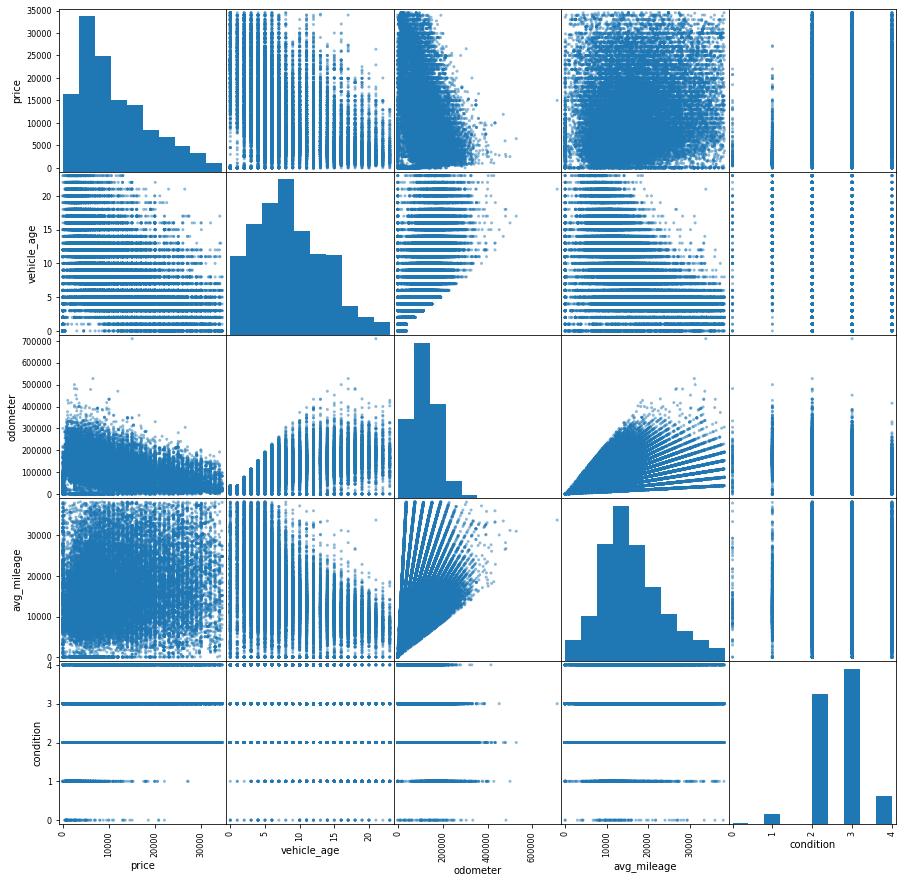

In [129]:
most_popular_original = most_popular_original[columns]
pd.plotting.scatter_matrix(most_popular_original, figsize=(15, 15)) 

In [130]:
import seaborn

In [131]:
most_popular_original.transmission.value_counts()

automatic    37624
manual        2067
other         1556
Name: transmission, dtype: int64

<AxesSubplot:xlabel='transmission', ylabel='price'>

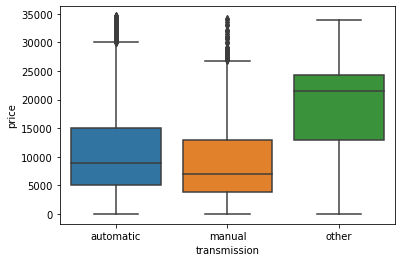

In [132]:
seaborn.boxplot(x="transmission", y="price", data=most_popular_original)

From this we can clearly see that cars with 'other' listed as transmission type has a higher average price than automatic and manual transmission.

In [133]:
most_popular_original.paint_color.value_counts()

white     11115
black      7895
silver     6564
grey       4720
blue       3782
red        3718
green      1121
brown       995
custom      915
orange      180
yellow      156
purple       86
Name: paint_color, dtype: int64

<AxesSubplot:xlabel='paint_color', ylabel='price'>

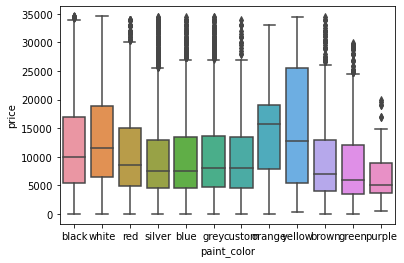

In [134]:
seaborn.boxplot(x="paint_color", y="price", data=most_popular_original)

Most popular color would be yellow, then white and then black according to average prices of cars listed for each color.

## OVERALL CONCLUSION

### PROBLEM STATEMENT
For the given dataset, our goal was to figure out what are the factors which affect the prices of vehicles listed.


### METHODOLOGY
To achieve our goal the data was processed the data through following 4 steps.
1. Studying the data given
2. Data Pre-processing
3. Adding extra information necessary for analysis
4. Performing EDA


#### STEP 1: Studying the data

The given dataset had a 51525 records with a number of anomalies init which are listed below:
1. 5 columns ('model_year', 'cylinders', 'is_4wd', 'odometer', 'paint_color') in the dataset had missing values.
2. Datatype for 2 columns ('model_year', 'cylinders') can be converted into integers. 

#### STEP 2:  Data Pre-processing
##### 1. Missing values
Five columns in the dataset had missing values,
1. ***is_4wd*** :  This one was fairly easy to populate as the data was binary and the missing values were indication of 'False' or not 4 wheel drive. So for keeping the things simple the missing values wre replaced by  '0'.
2. ***model_year*** : After through analysis, the missing values were filled with the highest occuring values for that particular model.
3. ***cylinders***: The missing values were filled with median number of cylinders for a particular model.
4. ***odometer***: This one was a bit tricky because there were cars, when grouped by _model_ and _model_year_, they didn't had any data to calculte mean or median. So the missing values were filled in 3 steps:
    - Step 1: The missing values were replaced with median values for vehicles grouped by _model_ and _model_year_, where mean and median was not Null.
    - Step 2: For rest of 38 value, the median values of odometer grouped by only model_year were calculated and used to fill the missing values, to get atleast the colosest values per year.
    - Step 3: Even after all that, there was one vehicle, having single entry,with a missing value. That one was removed from the dataset.
5. ***color***: The empty fields were filled by taking mode(most popular) of colors for the cars of a particular model.

##### 2. Changing data-types
Datatype for columns like 'model_year', 'cylinders' was changed to integer.

#### STEP 3: Adding extra information necessary for analysis

Following information is added to the dataset
1. **Day of week when the ad was posted**: Extracted from date_listed
2. **Month when the ad was posted**: Extracted from date_listed
3. **Year when the ad was posted**: Extracted from date_listed
4. **Vehicle's age at the time of ad posted**: Calculated by subtracting model_year from year_posted(calculated in precious step)
5. **Vehicle's average mileage per year**: Calculated by dividing odometer reading by vehicle's age
6. **Changing Condition Column to Numerical scale** : Assigned a numerical value to each condition


#### STEP 4: Performing EDA

##### Plotting the histograms

Studied the dataset according to price, vehicle's age when the ad was placed, mileage, number of cylinders, and condition, to find the outliers in the dataset
- Step1: First the above mentioned columns were extracted from the dataset
- Step2: Histograms were plotted to see the distribution of data along these parameters. The finding were as follow.
        PRICE:
         - around 7000 entries are near zero... that might be an indication of a possible outlier.
         - majority of cars in the dataset are below 25000 price range.
        AGE:
         - most of the cars in the listings are less than 10 years old.
         - There are a very few aged more than 20 years.
        Average-Mileage:
         - Around 2000 entiries have an average mileage near 0.
        Cylinders:
         - Most of the cars listed have 4,6 or 8 cylinders.
        Condition:
         - most of the are either in excellent or good condition. A very few of them are new or in salvage condition.       

##### Finding out outliers:      
         
- Step1: Plotting box plots and getting 5 point summary. This gave an insight of mean, median, and quarintiles for each column.
- Step2: Calculation IQR values to calculate the outliers. 
- Step3: Slicing the dataset according to outliers found in step2.

After slicing 46022 records remained out of 51525. Or in other words 5502 records contained outliers.

##### Compairing filtered histograms:

Once again the historgrams were ploted and after comparison, following were the findings:

- The price is now capped at 34555 instead of ridiculously high 375000.
- The average mileage is capped at 38321 from 373200 miles per year which means around 1022 miles per day -(This is only possible if the car was always on road 24/7 .. maybe these were Taxis)
- Vehicle age is also capped around 23 instead of 110 years.
- For Cylinders there is no change as nothing was outside of either limits
- As for the 'Condtion' we no longer have entries for new cars. Because the listings were too low.

##### Typical Life span of an advertisment

Typical/average life span of ad was 39.5 days, however there were 54 ads which were removed on the same day they were listed and also there were  1526 ads which were listed for more than 104 days.

And there seems to be no correlation between the life span of the ad to any other parameter in the dataset.

##### Most popular vehicle type:

The most popular vehicle types were ***SUV*** at the top with ***11396*** ads (24.8%) and at runnerup is ***Sedan*** with ***11332** ads (24.6%)

Whereas according to the average lisited price, buses takes the lead with average price of ***18107.428571***	following that are ***trucks*** with average price of ***14603.243658***

Detail Average prices, number of ads sorted by  number of ads are as follow, 


|**TYPE**       |**Average_Price** |**number of ads***
|--- | --- | ---|
|SUV	        |10146.506406	   |11396
|sedan	        |6747.467084	   |11332
|truck	        |14603.243658	   |10486
|pickup	        |14583.550397	   |6052
|coupe	        |13285.181635	   |1982
|wagon	        |8738.430790	   |1481
|mini-van	    |7575.031429       |1050
|hatchback	    |6614.275000	   |960
|van	        |8299.886792	   |530
|convertible  	|12950.002976	   |336
|other	        |9976.018349	   |218
|offroad	    |14105.432584	   |178
|bus	        |18107.428571	   |21


##### Factors impacting the price:
Considering age, mileage, condition, transmission type, and color of the car. The factors which has the most impact on the price of the car are
1. **age**:  The older the car, lower the price
2. **mileage**: higher the odometer reading lower the price

While other having considerably low impact on the price.
